# 5 - Agrupamentos

Para compreender como os distritos podem ser agrupados, serão gerados gráficos de dispersão.

O primeiro agrupamento é como o oferecimento se relaciona com a demanda. Para ficar mais fácil de ver, a análise será a cada ano.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import imageio
from pylab import rcParams
from matplotlib.pyplot import figure

rcParams['figure.figsize'] = 16, 9
rcParams['figure.dpi'] = 100

dados_educ_pop = pd.read_csv('dados/dados_educ_pop.csv', sep = ',')

def geraGrafico(periodo, mes):
    dados = dados_educ_pop[dados_educ_pop['MES_ANO_REF'] == periodo]
    dados = dados[dados_educ_pop['MES'] == mes]

    dados['MAT_TOTAL'] = dados['MAT_CRECHE']/dados['TOTAL']
    dados['DEM_TOTAL'] = dados['DEM_CRECHE']/dados['TOTAL']
    plt.ioff()
    plt.scatter(dados['MAT_TOTAL'], dados['DEM_TOTAL'], color='#440154')
    plt.title('Matrículas x Demanda - ' + periodo)
    plt.ylabel('Demanda relativa à população')
    plt.xlabel('Matrículas relativas à população')
    dados = dados[dados_educ_pop['DISTRITO'] == 'PENHA']
    plt.annotate(dados['DISTRITO_F'].values[0],
            xy=(dados['MAT_CRECHE']/dados['TOTAL'], dados['DEM_CRECHE']/dados['TOTAL']),  # theta, radius
            xytext=(0.05, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom',
            )
    plt.ylim(0, 0.6)
    plt.xlim(0, 1.1)
    
    plt.savefig('graficos/agrupamento_' + periodo + '.png', bbox_inches='tight')
    plt.close()   
    
def geraGif(periodos, mes):
    with imageio.get_writer('gifs/agrupamento_' + mes + '.gif', mode='I', duration=0.6) as writer:
        for periodo in periodos:
            if (periodo[:3] == mes):
                image = imageio.imread('graficos/agrupamento_' + periodo + '.png')
                writer.append_data(image)

mes = 'dez'
periodos = dados_educ_pop.MES_ANO_REF.unique()

for periodo in periodos:
    if (periodo[:3] == mes):
        geraGrafico(periodo, mes)

geraGif(periodos, mes)

/home/lsflp/.local/lib/python3.5/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/lsflp/.local/lib/python3.5/site-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


O segundo agrupamento será relacionado a como se comportaram as taxas de evolução do atendimento e da demanda.

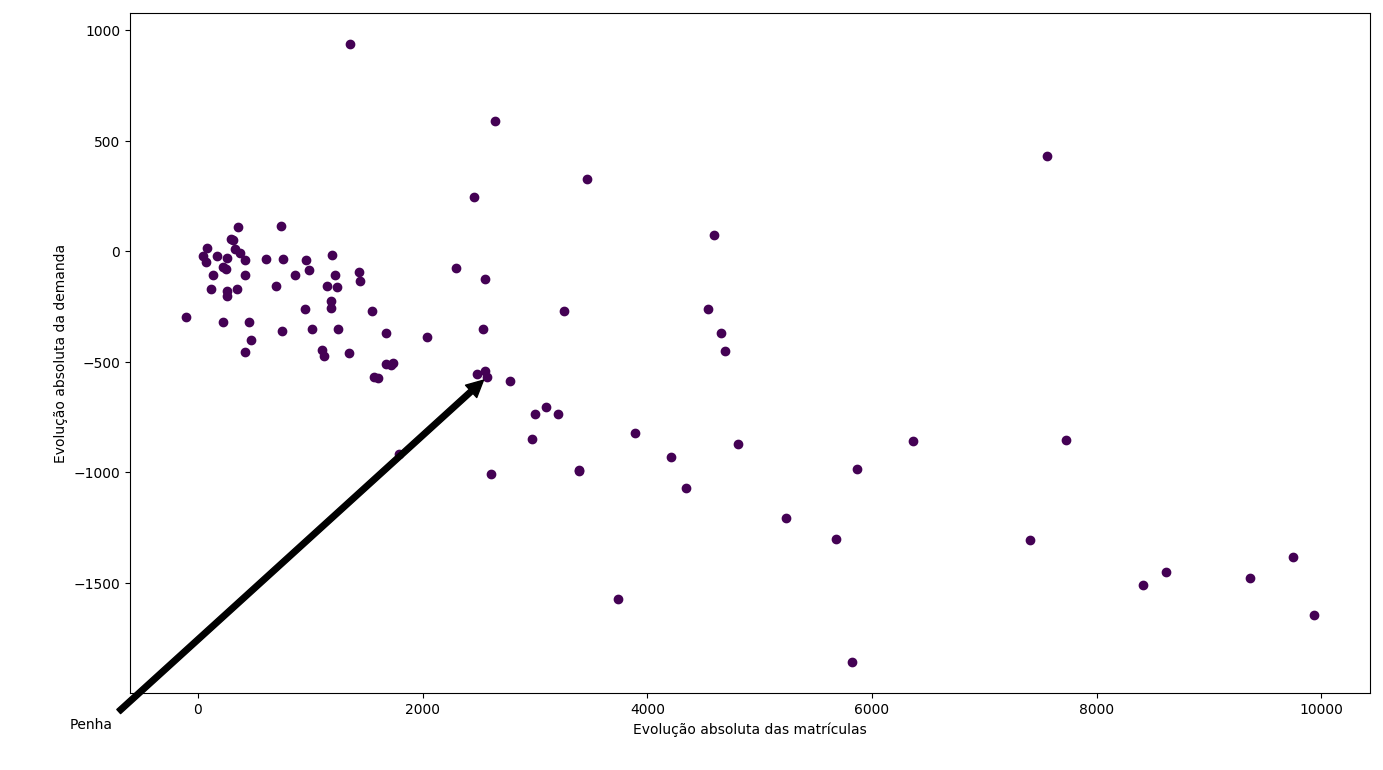

In [45]:
dados_atendimento = dados_educ_pop[['DISTRITO', 'MAT_CRECHE', 'DEM_CRECHE', 'MES_ANO_REF']]
dados_jun_2006 = dados_atendimento[dados_atendimento['MES_ANO_REF'] == 'jun-06']
dados_jun_2006.columns = ['DISTRITO', 'MAT_JUN_06', 'DEM_JUN_06', 'MES_ANO_REF']
dados_dez_2017 = dados_atendimento[dados_atendimento['MES_ANO_REF'] == 'dez-17']
dados_dez_2017.columns = ['DISTRITO', 'MAT_DEZ_17', 'DEM_DEZ_17', 'MES_ANO_REF']

dados_atendimento = dados_jun_2006.merge(dados_dez_2017, on = ['DISTRITO'])
dados_atendimento = dados_atendimento[['DISTRITO', 'MAT_JUN_06', 'MAT_DEZ_17', 'DEM_JUN_06', 'DEM_DEZ_17']]

dados_atendimento['EV_MAT_NUM'] = dados_atendimento['MAT_DEZ_17'] - dados_atendimento['MAT_JUN_06']
dados_atendimento['EV_MAT_PC'] = dados_atendimento['MAT_DEZ_17'] / dados_atendimento['MAT_JUN_06']
dados_atendimento['EV_DEM_NUM'] = dados_atendimento['DEM_DEZ_17'] - dados_atendimento['DEM_JUN_06']
dados_atendimento['EV_DEM_PC'] = dados_atendimento['DEM_DEZ_17'] / dados_atendimento['DEM_JUN_06']

plt.scatter(dados_atendimento['EV_MAT_NUM'], dados_atendimento['EV_DEM_NUM'], color='#440154')
dados_penha = dados_atendimento[dados_atendimento['DISTRITO'] == 'PENHA']
plt.annotate("Penha",
            xy=(dados_penha['EV_MAT_NUM'], dados_penha['EV_DEM_NUM']),  # theta, radius
            xytext=(0.05, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', shrink=0.01),
            horizontalalignment='left',
            verticalalignment='bottom',
            )
plt.xlabel('Evolução absoluta das matrículas')
plt.ylabel('Evolução absoluta da demanda')
plt.show()

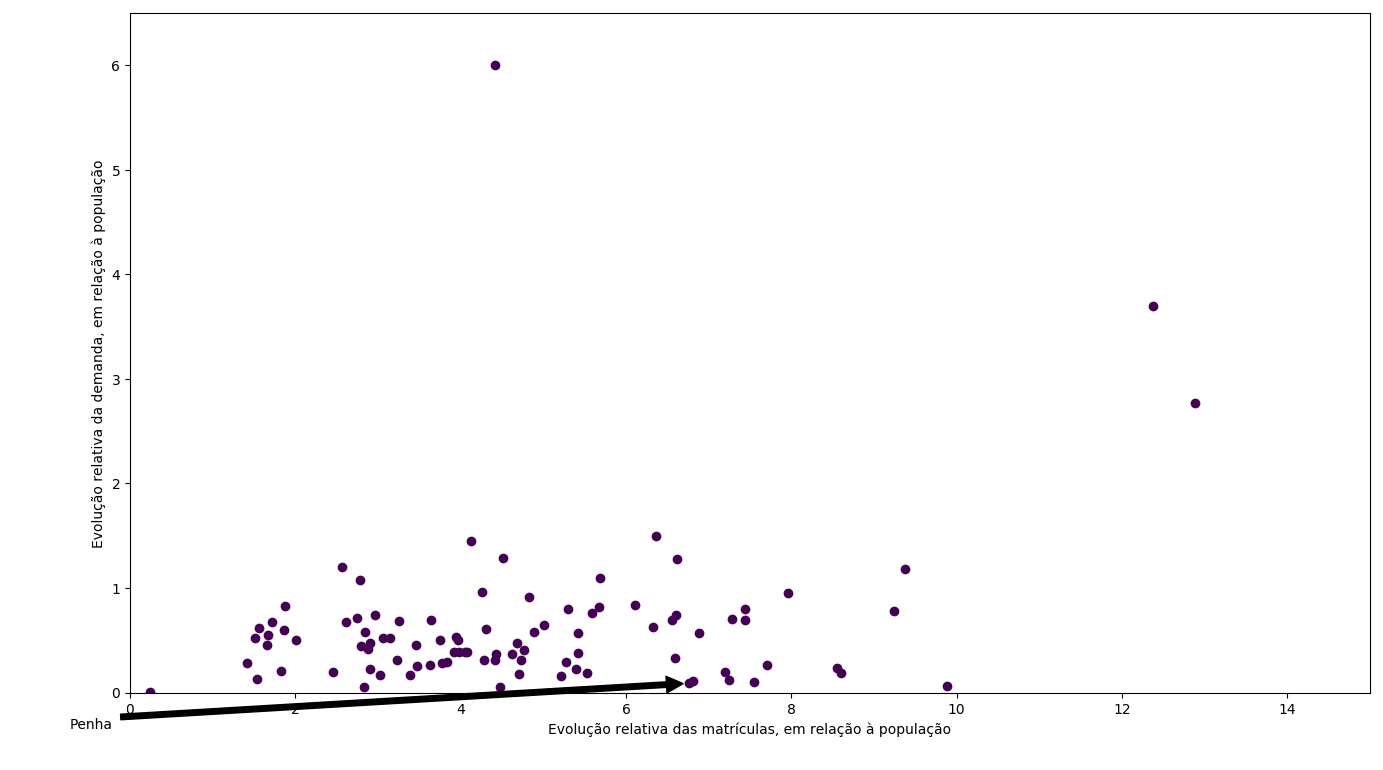

In [48]:
plt.scatter(dados_atendimento['EV_MAT_PC'], dados_atendimento['EV_DEM_PC'], color='#440154')
plt.annotate("Penha",
            xy=(dados_penha['EV_MAT_PC'], dados_penha['EV_DEM_PC']),  # theta, radius
            xytext=(0.05, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', shrink=0.01),
            horizontalalignment='left',
            verticalalignment='bottom',
            )
plt.xlabel('Evolução relativa das matrículas, em relação à população')
plt.ylabel('Evolução relativa da demanda, em relação à população')
plt.xlim(0, 15)
plt.ylim(0, 6.5)
plt.show()